In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as layers

In [2]:
BATCH_SIZE = 16

In [3]:
def get_survive_rate(data, column=-1, cond=-1):
    copied_data = data.copy()
    if(column != -1):
        if(cond != -1):
            copied_data = copied_data[copied_data[column] == cond]
        else:
            pass
    elif(cond != -1):
        copied_data = copied_data[cond]
    else:
        pass
    return (copied_data[copied_data['Survived'] == 1].shape[0] / copied_data.shape[0])

In [4]:
def get_age_range(x, range_len):
    return round(x / 5) * 5 + 2.5
def is_infant(x):
    if(x <= 11): return 1
    else: return 0

In [5]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
df.Survived.sum() / df.shape[0]

0.3838383838383838

In [7]:
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
dataset = df.copy()
testset = test_df.copy()

In [9]:
dataset = dataset.drop(columns=['Cabin', 'Ticket', 'Name'])
testset = testset.drop(columns=['Cabin', 'Ticket', 'Name'])

In [10]:
temp_df = dataset.copy()
temp_df = temp_df.fillna(-1)
condition = temp_df['Age'] >= 0
temp_df = temp_df[condition]
age_sum = temp_df['Age'].sum(axis=0)
valid_age_cnt = temp_df['Age'].count()
age_avg = round(age_sum / valid_age_cnt)

In [11]:
dataset['Age'] = dataset['Age'].fillna(age_avg)
testset['Age'] = testset['Age'].fillna(age_avg)


In [12]:
Embarked_mark = dataset['Embarked']
embarked_c = dataset[Embarked_mark == 'C']
embarked_s = dataset[Embarked_mark == 'S']
embarked_q = dataset[Embarked_mark == 'Q']
survived = dataset['Survived'] == 1

In [13]:
survival_rate_c = embarked_c[survived].shape[0] / embarked_c.shape[0]
survival_rate_s = embarked_s[survived].shape[0] / embarked_s.shape[0]
survival_rate_q = embarked_q[survived].shape[0] / embarked_q.shape[0]
print(survival_rate_c, survival_rate_q, survival_rate_s)

0.5535714285714286 0.38961038961038963 0.33695652173913043


/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
dataset = dataset.drop(columns='Embarked')
testset = testset.drop(columns='Embarked')

In [15]:
sibsp_dataset = dataset[dataset['SibSp'] > 0]
sibsp_dataset_male = sibsp_dataset[sibsp_dataset['Sex'] == 'male']
sibsp_dataset_female = sibsp_dataset[sibsp_dataset['Sex'] == 'female']
print(sibsp_dataset_male[sibsp_dataset_male['Survived'] == 1].shape[0] / sibsp_dataset_male.shape[0])
print(sibsp_dataset_female[sibsp_dataset_female['Survived'] == 1].shape[0] / sibsp_dataset_female.shape[0])

0.2517482517482518
0.6857142857142857


In [16]:
male_data = dataset[dataset['Sex'] == 'male']
female_data = dataset[dataset['Sex'] == 'female']
male_data_survived_rate = male_data[male_data['Survived'] == 1].shape[0] / male_data.shape[0]
female_data_survived_rate = female_data[female_data['Survived'] == 1].shape[0] / female_data.shape[0]
print(male_data_survived_rate, female_data_survived_rate)

0.18890814558058924 0.7420382165605095


In [17]:
age_plot_dataset = dataset.copy()
age_plot_dataset['Age'] = age_plot_dataset['Age'].apply(lambda x: get_age_range(x, 5))
ages = age_plot_dataset['Age'].unique()
survived_rate_range_ages = []
for age in ages:
    survived_rate = get_survive_rate(age_plot_dataset, 'Age', age)
    survived_rate_range_ages.append(survived_rate)

<BarContainer object of 17 artists>

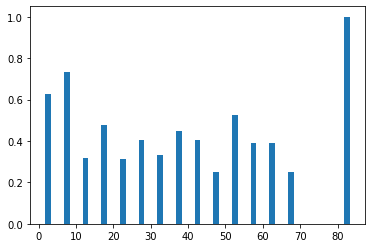

In [18]:
plt.bar(ages, survived_rate_range_ages, width=1.5)

In [19]:
dataset['Infant'] = dataset['Age'].apply(lambda x : is_infant(x))
testset['Infant'] = testset['Age'].apply(lambda x : is_infant(x))

In [20]:
temp = dataset.copy()
have_Parch = temp['Parch'] >= 1
have_SibSp = temp['SibSp'] >= 1
get_survive_rate(temp[(have_Parch | have_SibSp)])

0.5056497175141242

In [21]:
dataset['family'] = (dataset['Parch'] + dataset['SibSp'])
dataset = dataset.drop(columns='PassengerId')
testset['family'] = (testset['Parch'] + testset['SibSp'])
testset = testset.drop(columns='PassengerId')

In [22]:
dataset.to_excel('preprocessing.xlsx')

In [23]:
categorical_columns = ['Pclass', 'Sex']
for col in categorical_columns:
    le = preprocessing.LabelEncoder()
    le.fit(dataset[col].values)
    dataset[col] = le.transform(dataset[col].values)

for col in categorical_columns:
    le = preprocessing.LabelEncoder()
    le.fit(testset[col].values)
    testset[col] = le.transform(testset[col].values)

In [24]:
train, test = train_test_split(dataset, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [25]:
y_train = train.pop('Survived')
y_test = test.pop('Survived')
y_val = val.pop('Survived')

In [26]:
# test_data = df_to_dataset(test)
# train_data = df_to_dataset(train)
# val_data = df_to_dataset(val)

In [27]:
def ANN(optimizer):
    ann = Sequential()
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return ann

In [28]:
opt = tf.optimizers.Adam(lr=0.001)
ann = ANN(opt)
history = ann.fit(train, y_train,batch_size=BATCH_SIZE, epochs=100, validation_data=(val, y_val))


Epoch 1/100


/opt/anaconda3/envs/test/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-07-12 13:04:25.422853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


36/36 [==============================] - 1s 7ms/step - loss: 2.0482 - accuracy: 0.5149 - val_loss: 0.8497 - val_accuracy: 0.6084
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 1.5115 - accuracy: 0.5606 - val_loss: 0.7139 - val_accuracy: 0.6154
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.9638 - accuracy: 0.5817 - val_loss: 0.7057 - val_accuracy: 0.6224
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.9238 - accuracy: 0.6046 - val_loss: 0.7028 - val_accuracy: 0.6154
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.8720 - accuracy: 0.6327 - val_loss: 0.6934 - val_accuracy: 0.6224
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 0.7572 - accuracy: 0.6467 - val_loss: 0.6722 - val_accuracy: 0.6154
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.6362 - val_loss: 0.6522 - val_accuracy: 0.6224
Epoch 8/100
36/36 [======

6/6 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8436


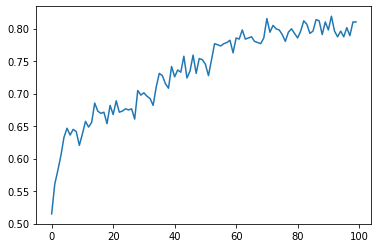

In [29]:
score = ann.evaluate(test, y_test)
plt.plot(history.history['accuracy'])

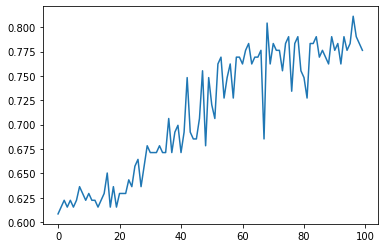

In [30]:
plt.plot(history.history['val_accuracy'])

In [33]:
testset

,Pclass,Sex,Age,SibSp,Parch,Fare,Infant,family
0,2,1,34.5,0,0,7.8292,0,0
1,2,0,47.0,1,0,7.0000,0,1
2,1,1,62.0,0,0,9.6875,0,0
3,2,1,27.0,0,0,8.6625,0,0
4,2,0,22.0,1,1,12.2875,0,2
...,...,...,...,...,...,...,...,...
413,2,1,30.0,0,0,8.0500,0,0
414,0,0,39.0,0,0,108.9000,0,0
415,2,1,38.5,0,0,7.2500,0,0
416,2,1,30.0,0,0,8.0500,0,0


In [32]:
ann.predict(testset)

14/14 [==============================] - 0s 1ms/step


array([[0.18128656],
       [0.4224074 ],
       [0.19813354],
       [0.18858981],
       [0.48605543],
       [0.1790246 ],
       [0.671524  ],
       [0.22861592],
       [0.7019969 ],
       [0.17047589],
       [0.18395478],
       [0.31224945],
       [0.77136207],
       [0.30712855],
       [0.7140704 ],
       [0.7081341 ],
       [0.2471773 ],
       [0.1885401 ],
       [0.55812645],
       [0.53283495],
       [0.3277713 ],
       [0.38350427],
       [0.77136207],
       [0.40144092],
       [0.77136207],
       [0.21307741],
       [0.77136207],
       [0.19035383],
       [0.30081737],
       [0.23397323],
       [0.30888265],
       [0.20233853],
       [0.50091475],
       [0.4845648 ],
       [0.30763176],
       [0.18553124],
       [0.68167377],
       [0.70695204],
       [0.18481278],
       [0.3579501 ],
       [0.20295535],
       [0.28337651],
       [0.17965409],
       [0.7650365 ],
       [0.72462165],
       [0.18963894],
       [0.3086074 ],
       [0.184

In [31]:
y_pred = ann.predict(testset)
y_pred = (y_pred > 0.5) * 1
submission = pd.DataFrame({"PassengerId": test_df['PassengerId'], "Survived":np.reshape(y_pred, len(y_pred))})
submission.to_csv('submission.csv', index=False)

14/14 [==============================] - 0s 873us/step
